In [21]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder 
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR 
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Define the transform to resize images to (255, 255)
transform = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor(),
    transforms.Grayscale()
])


train_path= "C:/Users/renax/Desktop/ACO/S9/Machine_Learning/plantvillage_deeplearning_paper_dataset/raw/grayscale_train"
test_path= "C:/Users/renax/Desktop/ACO/S9/Machine_Learning/plantvillage_deeplearning_paper_dataset/raw/grayscale_test"
# Define your dataset using ImageFolder and apply the transform
train_dataset = ImageFolder(root=train_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)


In [13]:

# Define the number of data loading workers
num_workers = 5  # You can adjust this number based on your CPU capacity

# Create data loaders with multiple workers
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=num_workers)



In [14]:

# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 127 * 127, 128)
        self.fc2 = nn.Linear(128, 38)  # 38 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 127 * 127)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [15]:
# Create an instance of the model
model = SimpleModel()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss() 

optimizer = optim.SGD(
    model.parameters(),
    lr=0.005,  # Base learning rate
    momentum=0.9,
    weight_decay=0.0005,  # Weight decay
)

lr_scheduler = StepLR(optimizer, step_size=30, gamma=0.1)


In [19]:
epochs= 30

In [17]:

# Training loop (you can modify this based on your specific requirements)
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

 # Step the learning rate scheduler at the end of each epoch
    lr_scheduler.step()

    # Calculate accuracy on the test set (optional)
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())

    accuracy = 100 * correct / total
    f1 = f1_score(true_labels, predicted_labels, average='weighted') 
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Test Accuracy: {accuracy}%, Test F1 Score: {f1}'
          
          )

KeyboardInterrupt: 

In [22]:
import pandas as pd
data = [
    {"Epoch": 1, "Loss": 1.5420483350753784, "Test Accuracy": 39.44069431051109, "Test F1 Score": 0.3218016556549692},
    {"Epoch": 2, "Loss": 2.148728847503662, "Test Accuracy": 41.1764705882353, "Test F1 Score": 0.35407520032941425},
    {"Epoch": 3, "Loss": 1.9140011072158813, "Test Accuracy": 47.380263580842175, "Test F1 Score": 0.44554185726012013},
    {"Epoch": 4, "Loss": 1.5047839879989624, "Test Accuracy": 47.798135647701706, "Test F1 Score": 0.4393201539172862},
    {"Epoch": 5, "Loss": 1.446469783782959, "Test Accuracy": 52.619736419157825, "Test F1 Score": 0.5182733539781756},
    {"Epoch": 6, "Loss": 1.4885807037353516, "Test Accuracy": 53.61620057859209, "Test F1 Score": 0.5014741383053246},
    {"Epoch": 7, "Loss": 0.7737486362457275, "Test Accuracy": 53.61620057859209, "Test F1 Score": 0.5219987846126846},
    {"Epoch": 8, "Loss": 0.6761755347251892, "Test Accuracy": 57.955641272902604, "Test F1 Score": 0.554637046410952},
    {"Epoch": 9, "Loss": 0.6287909150123596, "Test Accuracy": 59.65927354548377, "Test F1 Score": 0.5822755831332929},
    {"Epoch": 10, "Loss": 0.7971015572547913, "Test Accuracy": 56.57344905175185, "Test F1 Score": 0.5698330428539798},
    {"Epoch": 11, "Loss": 0.2733096182346344, "Test Accuracy": 62.90581806493089, "Test F1 Score": 0.6228151899432891},
    {"Epoch": 12, "Loss": 0.3167931139469147, "Test Accuracy": 63.67727418836387, "Test F1 Score": 0.628057343597984},
    {"Epoch": 13, "Loss": 0.09495073556900024, "Test Accuracy": 63.51655416264867, "Test F1 Score": 0.6367726961796616},
    {"Epoch": 14, "Loss": 0.1318705826997757, "Test Accuracy": 65.22018643522983, "Test F1 Score": 0.6463021136763489},
    {"Epoch": 15, "Loss": 0.03395581990480423, "Test Accuracy": 65.60591449694633, "Test F1 Score": 0.6436704350665781},
    {"Epoch": 16, "Loss": 0.019811851903796196, "Test Accuracy": 67.53455480552877, "Test F1 Score": 0.6704217790848643},
    {"Epoch": 17, "Loss": 0.06294342875480652, "Test Accuracy": 66.66666666666667, "Test F1 Score": 0.6607348354305081},
    {"Epoch": 18, "Loss": 0.006738824304193258, "Test Accuracy": 68.04885888781742, "Test F1 Score": 0.6782310747562115},
    {"Epoch": 19, "Loss": 0.015703903511166573, "Test Accuracy": 67.88813886210222, "Test F1 Score": 0.6753990122923855},
    {"Epoch": 20, "Loss": 0.0074675739742815495, "Test Accuracy": 68.04885888781742, "Test F1 Score": 0.6769057035348437},
    {"Epoch": 21, "Loss": 0.003892592154443264, "Test Accuracy": 68.2738669238187, "Test F1 Score": 0.6772011228122824},
    {"Epoch": 22, "Loss": 0.00593643868342042, "Test Accuracy": 67.82385085181613, "Test F1 Score": 0.6742661355736645},
    {"Epoch": 23, "Loss": 0.011993876658380032, "Test Accuracy": 68.01671488267438, "Test F1 Score": 0.6760815794382526},
    {"Epoch": 24, "Loss": 0.012240630574524403, "Test Accuracy": 67.88813886210222, "Test F1 Score": 0.6759522217759766},
    {"Epoch": 25, "Loss": 0.0038860745262354612, "Test Accuracy": 67.88813886210222, "Test F1 Score": 0.6738263629421145},
    {"Epoch": 26, "Loss": 0.006012689787894487, "Test Accuracy": 67.98457087753134, "Test F1 Score": 0.6772525285225807},
    {"Epoch": 27, "Loss": 0.00532130291685462, "Test Accuracy": 68.11314689810351, "Test F1 Score": 0.6762439628299233},
    {"Epoch": 28, "Loss": 0.005167136434465647, "Test Accuracy": 68.08100289296047, "Test F1 Score": 0.6760904748991196},
    {"Epoch": 29, "Loss": 0.005061861593276262, "Test Accuracy": 67.9524268723883, "Test F1 Score": 0.6746514581541561},
    {"Epoch": 30, "Loss": 0.0026662417221814394, "Test Accuracy": 67.69527483124398, "Test F1 Score": 0.6743557425782573},
]

df = pd.DataFrame(data)
# print(df)

In [23]:
df.at[2,"Test F1 Score"]

0.44554185726012013

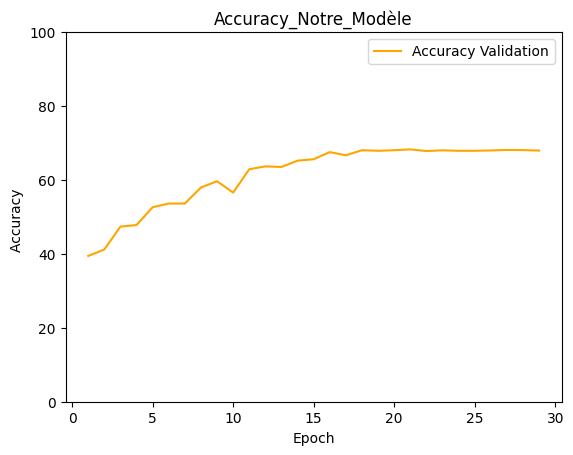

In [24]:

# Créez des listes vides pour stocker les valeurs de l'axe x (époques) et y (F1 Score)
x_epochs = []
y_accuracy = []

# Parcourez les données et stockez les valeurs dans les listes
for n_epochs in range(0, 29):
    x_epochs.append(n_epochs + 1)  # Époque commence à 1
    y_accuracy.append(df.at[n_epochs, "Test Accuracy"])

# Tracer les données
plt.plot(x_epochs, y_accuracy, label='Accuracy Validation',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy ')
plt.ylim(0, 100)
plt.legend()
plt.title('Accuracy_Notre_Modèle')
plt.show()
